In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [67]:
n = 29
k = 5
alpha = 0.4
rad = 1 #Adjacency Radius
w = [[0, 0] for i in range(k)]

cor = [[] for i in range(n+2)]


#Input
file1 = open('Desktop/bayg.tsp', 'r') 
Lines = file1.readlines()

for line in Lines:
    i, x, y = line.split()
    x, y = float(x), float(y)
    i = int(i)
    cor[i].append(x)
    cor[i].append(y)

cor = cor[1:30]
#1840.0 2300.0

In [68]:
"""
w = [[0, 50], [0, 150],
     [46, 200], [138, 200],
     [185, 150], [185, 50],
     [138, 0], [46, 0]]
"""
"""
w = [[30, 50], [30, 100], [30, 150],
     [90, 50], [90, 100], [90, 150],
     [140, 50], [140, 100], [140, 150]
    ]
"""
"""
w = [[52, 50], [72, 150],
     [130, 50],[130, 120]]
"""

w = []
for i in range(5):
    x, y = random.choice(range(184)), random.choice(range(200))
    w.append(list([x, y]))

w

[[95, 180], [164, 198], [42, 119], [63, 32], [150, 97]]

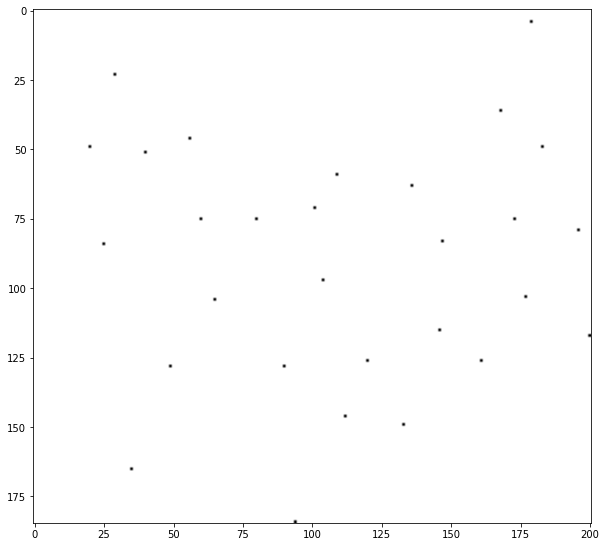

In [69]:
Map = [[255 for i in range(30, 231)] for j in range(0, 185)]

for c in cor:
    Map[int(c[0])//10][int(c[1])//10 -30] = 0
    
plt.figure(figsize=(10,10))
plt.axis('on')
plt.imshow(Map, cmap='gray')

In [70]:
#Functions

def cluster(x, y):
    mini = 1e12
    minc = -1
    for i in range(k):
        tmp = (x-w[i][0])**2 + (y-w[i][1])**2
        if tmp < mini:
            mini = tmp
            minc = i
    return minc

def Show():
    A = [[255 for i in range(30, 231)] for j in range(0, 185)]
    for i in range(185-0):
        for j in range(231-30):
            A[i][j] = (cluster(i, j)+1)*20
    
    for c in cor:
        A[int(c[0])//10][int(c[1])//10 -30] = 0
    
    plt.figure(figsize=(10,10))
    plt.axis('on')
    plt.imshow(A, cmap='jet')
    #print(A)

def dis(a, b):
    return ((w[a][0]-w[b][0])**2 + (w[a][1]-w[b][1])**2)**(0.5);

def distance(a, b):
    return ((a[0]-b[0])**2 +(a[1]-b[1])**2)**(0.5)

def cost(L):
    anis = 0
    for i in range(1, len(L)):
        anis += distance(L[i-1], L[i])
    return anis

def isOne(mask, i):
    while (i != 0):
        mask = mask//2
        i-=1
    
    if mask%2 == 0:
        return False
    return True



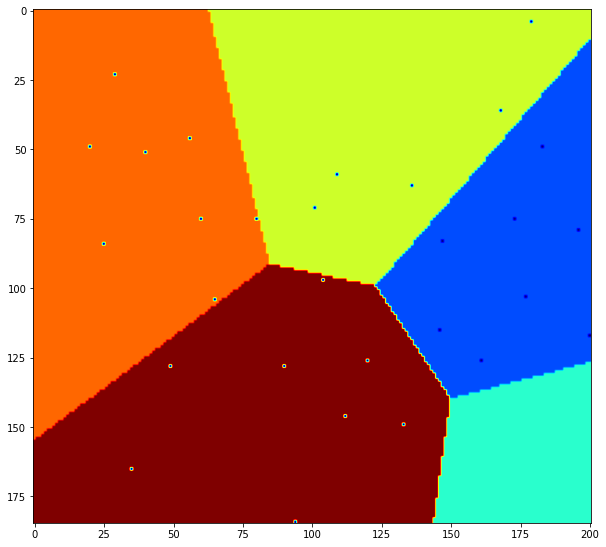

In [71]:
Show()

In [7]:
neig = 10
for _ in range(20):
    print("ROUND: " , _)
    for i in range(n):
        x = cluster(cor[i][0]//10, cor[i][1]//10 -30)
        #print("for", cor[i][0], cor[i][1], "cluster is:", x)
        
        for t in range(k):
            if dis(x, t) <= neig:
                w[t][0] += alpha*((cor[i][0]//10)-w[t][0])
                w[t][1] += alpha*((cor[i][1]//10 - 30)-w[t][1])
                #print("changing t: ", t ," because of : " , cor[i][0], cor[i][1])
    neig-=1
    alpha -= 0.01
    if (alpha <= 0 or neig <= 0):
        print("Yallow", alpha, neig)
        break

ROUND:  0
ROUND:  1
ROUND:  2
ROUND:  3
ROUND:  4
ROUND:  5
ROUND:  6
ROUND:  7
ROUND:  8
ROUND:  9
Yallow 0.29999999999999993 0


[[137.68485809105655, 91.77985651341167], [52.173017446838216, 53.21238812569468], [73.89526730133147, 170.29432033632636], [16, 95], [35, 53]]


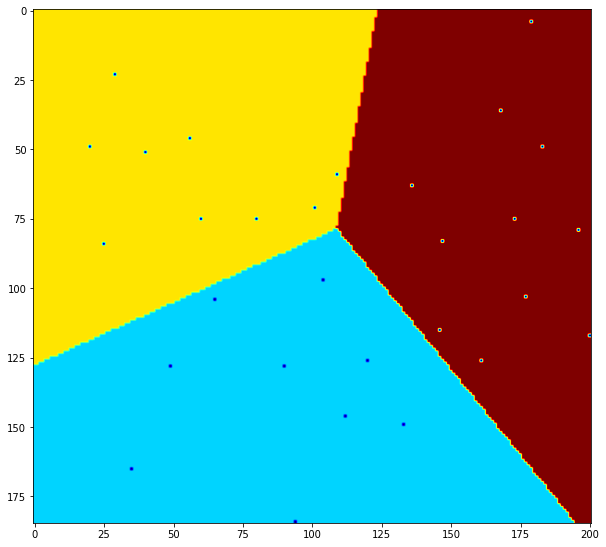

In [8]:
print(w)
Show()

In [9]:
cl = [[] for i in range(k) ]
for c in cor:
    cl[cluster(c[0]//10, c[1]//10 -30)].append(c)

for i in range(k):
    print(len(cl[i]))
    if len(cl[i]) > 9:
        print("Serious Warning! cluster", i, "is too big of a deal for factorial!")
        print("Serious Warning! cluster", i, "is too big of a deal for factorial!")
        print("Serious Warning! cluster", i, "is too big of a deal for factorial!")
        print("Serious Warning! cluster", i, "is too big of a deal for factorial!")
        

#for i in range(len(cl)):
#    print(cl[i])

9
9
11
Serious Warning! cluster 2 is too big of a deal for factorial!
Serious Warning! cluster 2 is too big of a deal for factorial!
Serious Warning! cluster 2 is too big of a deal for factorial!
Serious Warning! cluster 2 is too big of a deal for factorial!


In [28]:
totalCost = 0

for i in range(k):
    print("Calculating all permutations for cluster:", i)
    best = 1e12
    bestPer = []
    for per in list(itertools.permutations(cl[i])):
        #print(per)
        per = list(per)
        if cost(per) < best:
            best = cost(per)
            bestPer = per.copy()
    cl[i] = bestPer.copy()
    #print("well, best would be:", cl[i])
    totalCost += best

Calculating all permutations for cluster: 0
Calculating all permutations for cluster: 1
Calculating all permutations for cluster: 2
Calculating all permutations for cluster: 3
Calculating all permutations for cluster: 4


In [29]:
for i in range(len(cl)):
    print(cl[i])

[[1170.0, 2300.0], [1030.0, 2070.0], [1260.0, 1910.0], [1150.0, 1760.0]]
[[630.0, 1660.0], [830.0, 1770.0], [750.0, 2030.0], [790.0, 2260.0], [490.0, 2130.0], [360.0, 1980.0], [40.0, 2090.0]]
[[970.0, 1340.0], [1280.0, 1200.0], [1260.0, 1500.0], [1490.0, 1630.0], [1460.0, 1420.0], [1840.0, 1240.0]]
[[230.0, 590.0], [490.0, 500.0], [510.0, 700.0], [460.0, 860.0], [750.0, 900.0], [750.0, 1100.0], [710.0, 1310.0], [590.0, 1390.0]]
[[1650.0, 650.0], [1280.0, 790.0], [1040.0, 950.0], [840.0, 550.0]]


In [30]:
veryBest = [2, 28, 4, 20, 1, 19, 9, 3, 14, 17, 13, 16, 21, 10, 18, 24, 6, 22, 7, 26, 15, 12, 23, 0, 27, 5, 11, 8, 25]


In [31]:
cl

[[[1170.0, 2300.0], [1030.0, 2070.0], [1260.0, 1910.0], [1150.0, 1760.0]],
 [[630.0, 1660.0],
  [830.0, 1770.0],
  [750.0, 2030.0],
  [790.0, 2260.0],
  [490.0, 2130.0],
  [360.0, 1980.0],
  [40.0, 2090.0]],
 [[970.0, 1340.0],
  [1280.0, 1200.0],
  [1260.0, 1500.0],
  [1490.0, 1630.0],
  [1460.0, 1420.0],
  [1840.0, 1240.0]],
 [[230.0, 590.0],
  [490.0, 500.0],
  [510.0, 700.0],
  [460.0, 860.0],
  [750.0, 900.0],
  [750.0, 1100.0],
  [710.0, 1310.0],
  [590.0, 1390.0]],
 [[1650.0, 650.0], [1280.0, 790.0], [1040.0, 950.0], [840.0, 550.0]]]

drawing line between 28 [117, 200]  and  2 [103, 177]
drawing line between 4 [103, 177]  and  28 [126, 161]
drawing line between 20 [126, 161]  and  4 [115, 146]
drawing line between 28 [63, 136]  and  2 [83, 147]
drawing line between 4 [83, 147]  and  28 [75, 173]
drawing line between 20 [75, 173]  and  4 [79, 196]
drawing line between 1 [79, 196]  and  20 [49, 183]
drawing line between 19 [49, 183]  and  1 [36, 168]
drawing line between 9 [36, 168]  and  19 [4, 179]
drawing line between 28 [97, 104]  and  2 [128, 90]
drawing line between 4 [128, 90]  and  28 [126, 120]
drawing line between 20 [126, 120]  and  4 [149, 133]
drawing line between 1 [149, 133]  and  20 [146, 112]
drawing line between 19 [146, 112]  and  1 [184, 94]
drawing line between 28 [23, 29]  and  2 [49, 20]
drawing line between 4 [49, 20]  and  28 [51, 40]
drawing line between 20 [51, 40]  and  4 [46, 56]
drawing line between 1 [46, 56]  and  20 [75, 60]
drawing line between 19 [75, 60]  and  1 [75, 80]
drawing lin

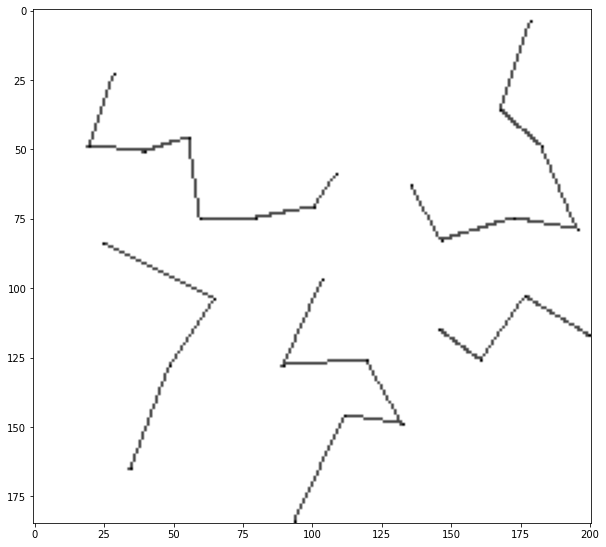

In [33]:
Map = [[255 for i in range(30, 231)] for j in range(0, 185)]
veryBest = [2, 28, 4, 20, 1, 19, 9, 3, 14, 17, 13, 16, 21, 10, 18, 24, 6, 22, 7, 26, 15, 12, 23, 0, 27, 5, 11, 8, 25, 2]


for i in range(k):
    for j in range(1, len(cl[i])):
    #for j in range(1, n+1):
        a = cl[i][j-1].copy()  #Draw Line
        b = cl[i][j].copy()
        #a = cor[veryBest[j]].copy()
        #b = cor[veryBest[j-1]].copy()
        
        a[0] = int(a[0]//10)
        a[1] = int(a[1]//10) -30
        b[0] = int(b[0]//10)
        b[1] = int(b[1]//10) -30
        print("drawing line between", veryBest[j], a, " and ", veryBest[j-1], b)
        
        if abs(a[0]-b[0]) < 1:
            for helper in range (min(a[1], b[1]), max(a[1], b[1])):
                Map[a[0]][helper] = 70
            continue
        
        if a[0] > b[0]:
            a, b = b, a
        c = a.copy()
        while (c[0] < b[0]):
            helper = c[1]
            c[1] += (b[1]-a[1])/(b[0]-a[0])
            
            if helper < c[1]:
                counter = helper
                while (counter < c[1]):
                    Map[int(c[0])][int(counter)] = 70
                    counter += 1
                
            if helper > c[1]:
                counter = helper
                while (counter > c[1]):
                    Map[int(c[0])][int(counter)] = 70
                    counter -= 1
                    
            c[0] += 1
            Map[int(c[0])][int(c[1])] = 70

for i in range(k):
    for j in range(1, len(cl[i])):
        Map[int(cl[i][j-1][0])//10][int(cl[i][j-1][1])//10 -30] = 0
        Map[int(cl[i][j][0])//10][int(cl[i][j][1])//10 -30] = 0
        
plt.figure(figsize=(10,10))
plt.axis('on')
plt.imshow(Map, cmap='gray')
print("The cost yet:", totalCost)

In [34]:
#Adding the interstellar edges!
bestPer = []
bestDis = 1e12
bestMask = 0

allPers = list(itertools.permutations( [i for i in range(k)] ))

for times in range(5000):
    
    per = random.choice(allPers);
    if times%1000 == 0:
        print(times/1000,"/5")
    
    for mask in range(2**k):
        tmp = 0
        for i in range(k):
            if len(cl[per[i]]) == 0:
                continue;
            
            if isOne(mask, i) == True:
                first = cl[per[i]][ len(cl[per[i]])-1 ]
            if isOne(mask, i) == False:
                first = cl[per[i]][0];
            
            j = (i+1)%k;
            while (len(cl[per[j]]) == 0):
                j = (j+1)%k;
            if isOne(mask, j) == False:
                second = cl[per[j]][ len(cl[per[j]])-1 ]
            if isOne(mask, j) == True:
                second = cl[per[j]][0]
            
            tmp += distance(first, second)
        
        if tmp < bestDis:
            bestDis = tmp
            bestPer = list(per).copy()
            bestMask = mask


0.0 /5
1.0 /5
2.0 /5
3.0 /5
4.0 /5


In [35]:
bestPer

[0, 2, 4, 3, 1]

In [36]:
bestMask

31

total Cost: 9606.785610008428


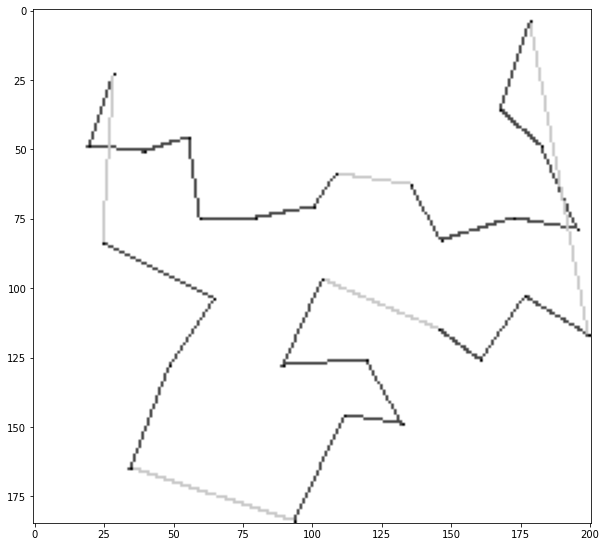

In [37]:
per = bestPer
mask = bestMask

for i in range(k):
    
    if len(cl[per[i]]) == 0:
        continue;
        
    if isOne(mask, i) == True:
        first = cl[per[i]][ len(cl[per[i]])-1 ]
    if isOne(mask, i) == False:
        first = cl[per[i]][0];
    
    j = (i+1)%k;
    while (len(cl[per[j]]) == 0):
        j = (j+1)%k;
    
    
    if isOne(mask, j) == False:
        second = cl[per[j]][ len(cl[per[j]])-1 ]
    if isOne(mask, j) == True:
        second = cl[per[j]][0]
    
    a = first.copy()  #Draw Line
    b = second.copy()
    totalCost += distance(a, b)
    a[0] = int(a[0]//10)
    a[1] = int(a[1]//10) -30
    b[0] = int(b[0]//10)
    b[1] = int(b[1]//10) -30
    
    if a[0] > b[0]:
        a, b = b, a
    c = a.copy()
    while (c[0] < b[0]):
        helper = c[1]
        c[1] += (b[1]-a[1])/(b[0]-a[0])

        if helper < c[1]:
            counter = helper
            while (counter < c[1]):
                Map[int(c[0])][int(counter)] = 200
                counter += 1

        if helper > c[1]:
            counter = helper
            while (counter > c[1]):
                Map[int(c[0])][int(counter)] = 200
                counter -= 1

        c[0] += 1
        Map[int(c[0])][int(c[1])] = 100

for i in range(k):
    for j in range(1, len(cl[i])):
        Map[int(cl[i][j-1][0])//10][int(cl[i][j-1][1])//10 -30] = 0
        Map[int(cl[i][j][0])//10][int(cl[i][j][1])//10 -30] = 0

plt.figure(figsize=(10,10))
plt.axis('on')
plt.imshow(Map, cmap='gray')
print("total Cost:", totalCost)

In [ ]:
9791.94243587445

9074.14
[2, 28, 4, 20, 1, 19, 9, 3, 14, 17, 13, 16, 21, 10, 18, 24, 6, 22, 7, 26, 15, 12, 23, 0, 27, 5, 11, 8, 25]
[15, 12, 23, 0, 27, 5, 11, 8, 25, 2, 28, 4, 20, 1, 19, 9, 3, 14, 17, 13, 16, 21, 10, 18, 24, 6, 22, 7, 26]